## 1 - Ler o arquivo csv googleplaystore.csv e remova as linhas duplicadas

In [16]:
import pandas as pd

df = pd.read_csv("googleplaystore.csv")
#limparando as linhas duplicadas
df.drop_duplicates()
df = df.drop_duplicates(subset='App')

#optei por fazer várias limpezas aqui
#removendo os apps com Rating maior que 5 e menor que 1, pois na playstore não existe rating acima desses.
df = df[df['Rating'].between(1, 5)]

# Removendo o símbolo de dólar e convertendo a coluna 'Price' para float
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')



## 2 - Faça um gráfico de barras contendo os top 5 apps por número de instalação.

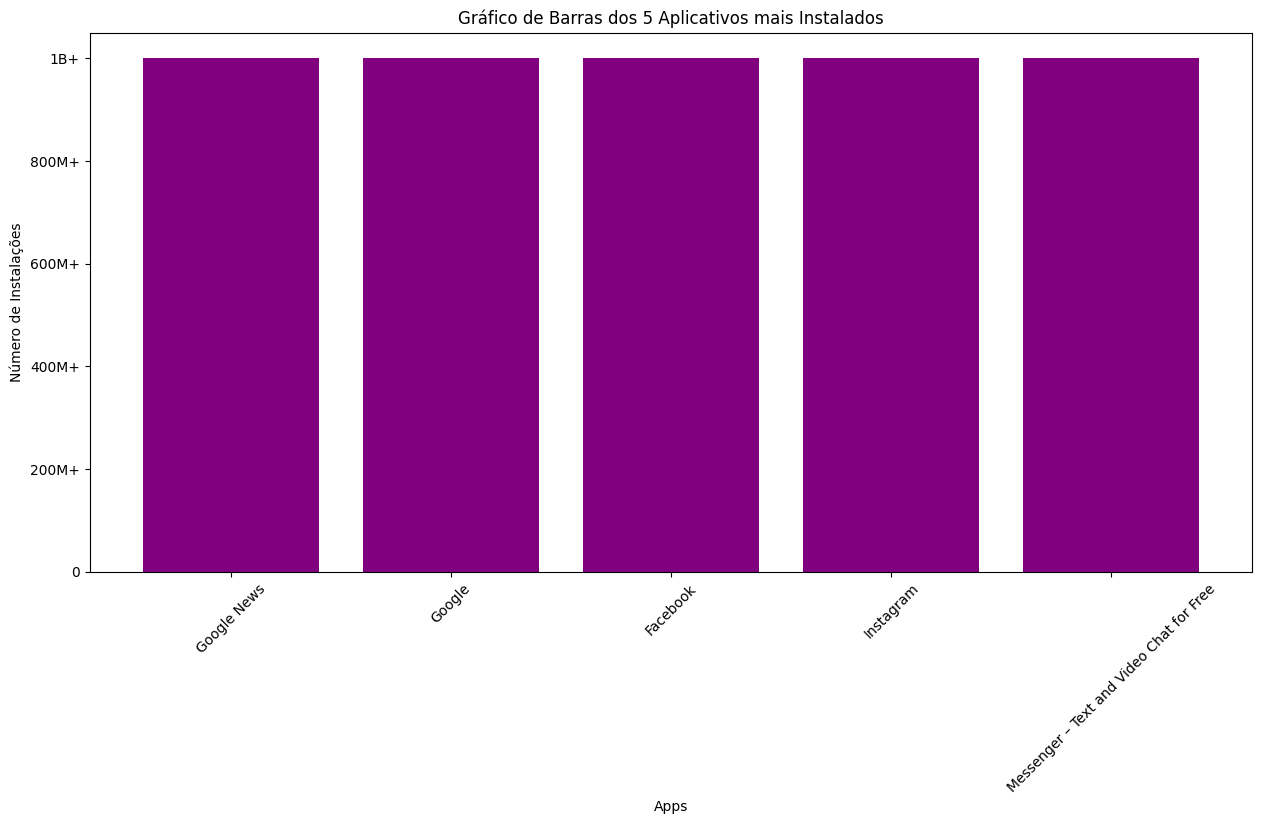

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.ticker as ticker

# Função para converter o formato de instalações para inteiro
def convert_installs(installs_str):
    if installs_str == 'Free':
        return 0
    else:
        return int(re.sub(r'[+,"]', '', installs_str))

def formatQuant(value, pos):
    if value == 0:
        return '0'
    elif value < 1000:
        return f"{value:,}"
    elif value < 1000000:
        return f"{value/1000:,.0f}K+"
    elif value < 1000000000:
        return f"{value/1000000:,.0f}M+"
    else:
        return f"{value/1000000000:,.0f}B+"
    
# Seleciona as colunas 'App' e 'Installs', convertendo os valores de 'Installs'
top_5 = df[['App', 'Installs']].sort_values('Installs', ascending=False, key=lambda x: x.apply(convert_installs)).head(5)

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(top_5['App'], top_5['Installs'].apply(convert_installs), color='purple')

ax.set_xlabel('Apps')
ax.set_ylabel('Número de Instalações')
ax.set_title('Gráfico de Barras dos 5 Aplicativos mais Instalados')

ax.tick_params(axis='x', rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatQuant))
plt.show()


## 3. Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem.

C:\Users\srdes\AppData\Local\Temp\ipykernel_31004\3927006832.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gist_ncar', num_colors)


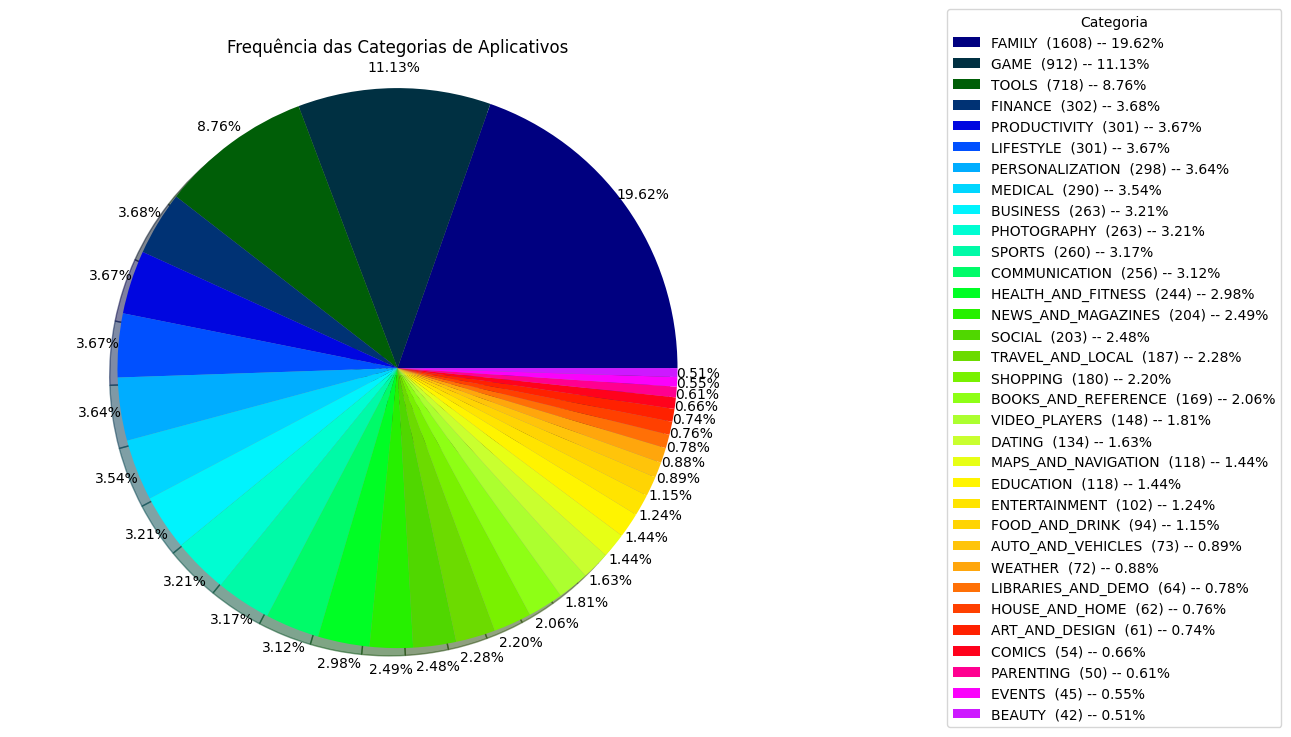

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Conta a quantidade de aplicativos em cada categoria
category_counts = df['Category'].value_counts()

# Definição das cores personalizadas para melhorar a avaliação
num_colors = 40
cmap = cm.get_cmap('gist_ncar', num_colors)
colors = [cmap(i) for i in range(num_colors)]

# Cria o gráfico de pizza com cores personalizadas, sombra e ajustes
fig, ax = plt.subplots(figsize=(10, 8))
patches, texts, autotexts = ax.pie(category_counts, labels=None, pctdistance=1.075, autopct='%1.2f%%', colors=colors, shadow=True)

# Calcula as porcentagens manualmente
total = sum(category_counts)
percentages = [f"{(count / total) * 100:.2f}%" for count in category_counts]

# Ajusta o formato dos rótulos da legenda
for autotext in autotexts:
    autotext.set_text(f"{autotext.get_text()}")

ax.axis('equal')  

ax.set_title('Frequência das Categorias de Aplicativos')
legend_labels = [f"{category}  ({count}) -- {percentage}" for category, count, percentage in zip(category_counts.index, category_counts, percentages)]
plt.legend(patches, legend_labels, title="Categoria", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))

plt.show()


## 4 - Mostre qual o app mais caro existente no dataset.

In [5]:
from IPython.display import display

# Ordenando o dataframe pelo preço em ordem decrescente
resultado = df.sort_values('Price', ascending=False)

# Exibindo o produto mais caro de forma mais organizada
Mais_caro = resultado.head(1)

display(Mais_caro)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


## 5 - Mostre quantos apps são classificados como 'Mature 17+'.

In [6]:
EncontrarClassificacao = df['Content Rating'].value_counts()

print("Total de Apps:",f"{EncontrarClassificacao['Mature 17+']} Apps com a Classificação Mature 17+ ")


Total de Apps: 357 Apps com a Classificação Mature 17+ 


## 6 - Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews.

In [7]:
# Convertendo a coluna 'Reviews' para int
df['Reviews'] = df['Reviews'].astype(int)

# Ordenando o dataframe pelo número de reviews em ordem decrescente
df_ordernar_reviews = df.sort_values('Reviews', ascending=False)

# Exibindo o top 10 apps por número de reviews
top_10_apps_by_reviews = df_ordernar_reviews[['App', 'Reviews']].head(10)
display(top_10_apps_by_reviews)


,App,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2545,Instagram,66577313
335,Messenger – Text and Video Chat for Free,56642847
1670,Clash of Clans,44891723
4005,Clean Master- Space Cleaner & Antivirus,42916526
1654,Subway Surfers,27722264
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1660,Clash Royale,23133508


## 7 - Crie pelo menos mais 2 cálculos sobre o dataset e apresente um em formato de lista e outro em formato de valor. 

### 7.1 - Script para cálcular os 5 apps mais bem avaliados que começam com a letra A

In [6]:
df_ordernar_Apps = df[df['App'].str.startswith('a', na=False)].sort_values('Rating', ascending=False)
top_5_apps_rating = df_ordernar_Apps[['App', 'Rating']].head(5)
display(top_5_apps_rating)

,App,Rating
5466,"ap,wifi testing,iperf,ping,android,Bluetooth,tcp",4.7
5206,ai robot keyboard,4.7
93,auto fines,4.6
3564,aCalendar+ Calendar & Tasks,4.6
1526,auto Call Recorder 2018,4.5


### 7.2 - Script para cálcular o app mais mal avaliados da categoria GAME

In [7]:
df_ordernar_Categorias = df[df['Category'].str.startswith('GAME', na=False)].sort_values('Rating', ascending=True)
app_rating = df_ordernar_Categorias[['App', 'Rating']].head(1)
display(app_rating ) 

,App,Rating
6319,BJ Bridge Standard American 2018,1.0


## 8. Crie pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca matplotlib. Escolha tipos de gráficos diferentes dos explorados acima. Por exemplo: linhas e dispersão.

#### 1 . Gráfico de histograma para analisar a distribuição de avaliações dos aplicativos

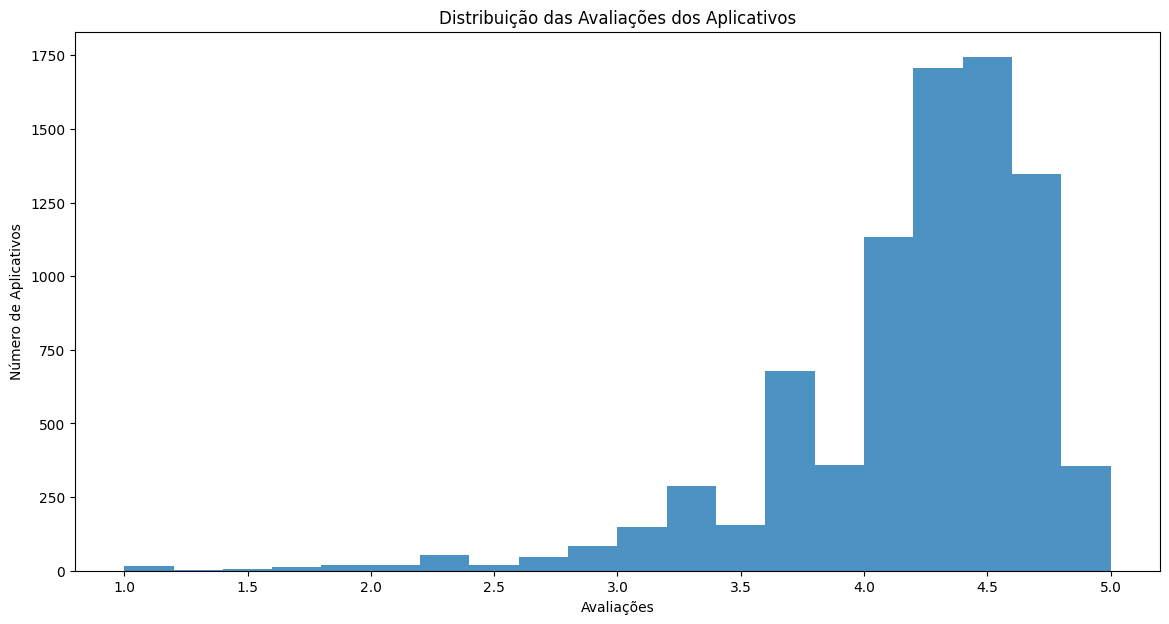

In [15]:
import matplotlib.pyplot as plt

# Preparando os dados para o gráfico
ratings = df['Rating'].dropna()  # Removendo valores NaN

# Criando o gráfico
fig, ax = plt.subplots(figsize=(14, 7))
ax.hist(ratings, bins=20, alpha=0.8)
ax.set_title('Distribuição das Avaliações dos Aplicativos')
ax.set_xlabel('Avaliações')
ax.set_ylabel('Número de Aplicativos')

plt.show()






#### Gráfico de Linha para mostrar qual categoria tem mais avaliações

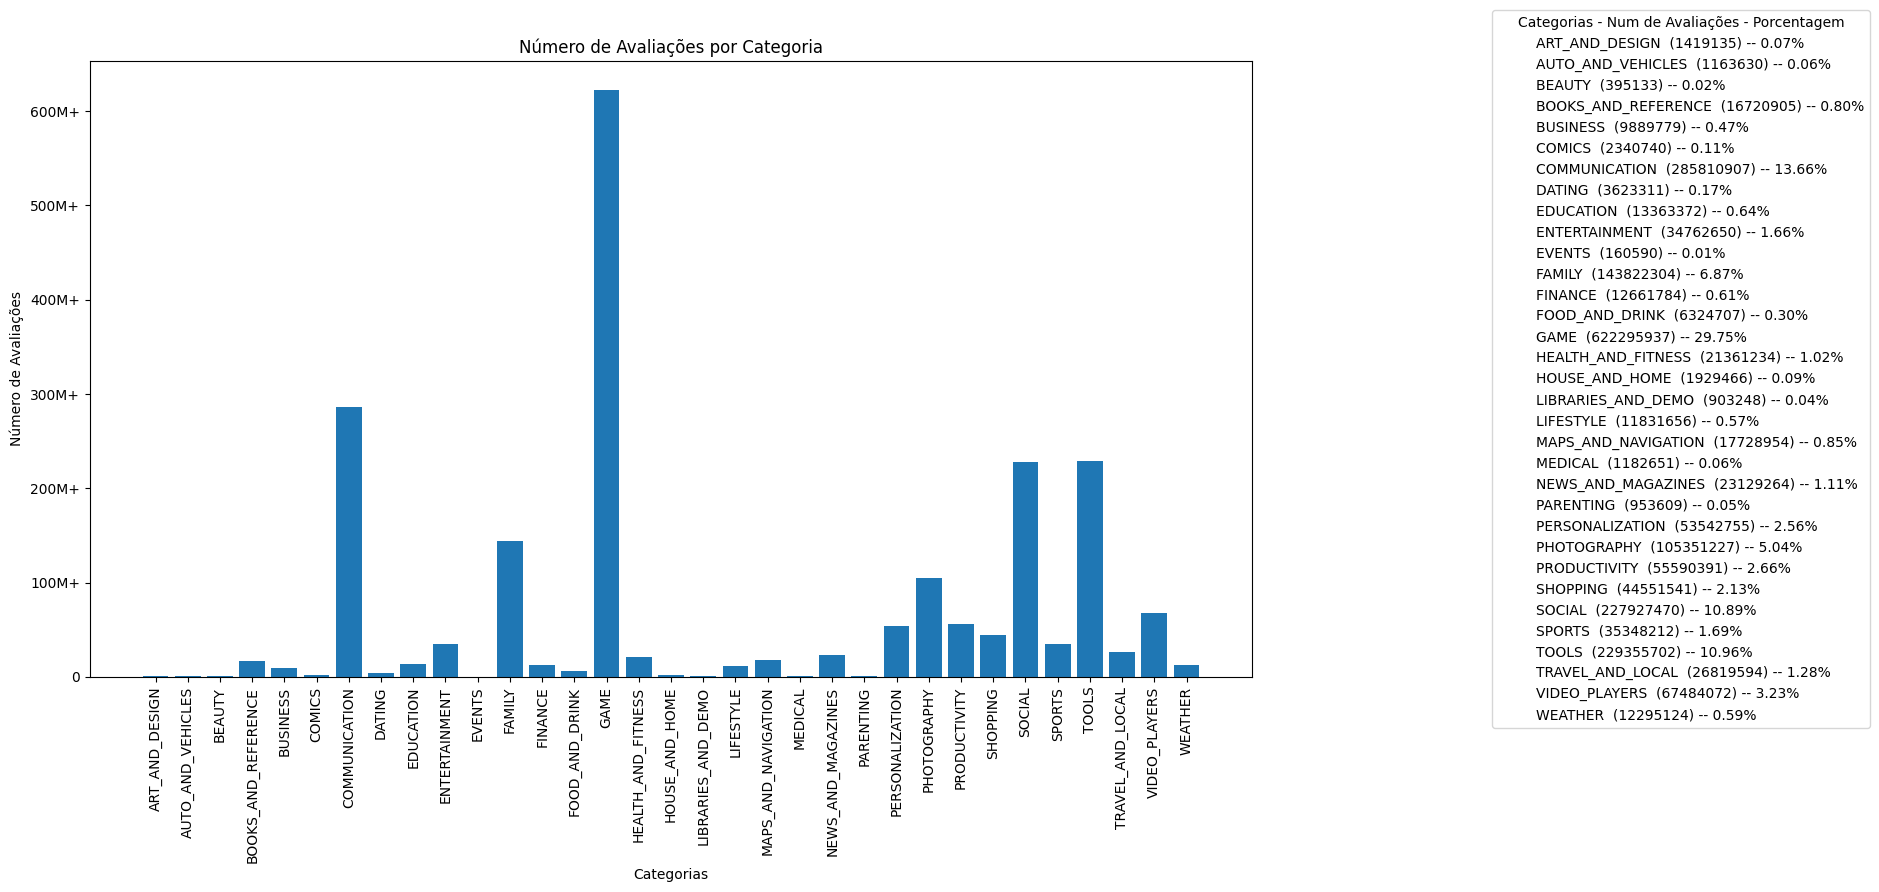

In [19]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def formatarQuant(value, pos):
    if value == 0:
        return '0'
    elif value < 1000:
        return f"{value:,}"
    elif value < 1000000:
        return f"{value/1000:,.0f}K+"
    elif value < 1000000000:
        return f"{value/1000000:,.0f}M+"
    else:
        return f"{value/1000000000:,.0f}B+"
    
# Convertendo a coluna 'Reviews' para numérico
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Somando as avaliações para cada categoria
reviews_per_category = df.groupby('Category')['Reviews'].sum()

# Preparando os dados para o gráfico
categories = reviews_per_category.index
review_soma = reviews_per_category.values

# Criando o gráfico
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(categories, review_soma, alpha=1)
ax.set_title('Número de Avaliações por Categoria')
ax.set_xlabel('Categorias')
ax.set_ylabel('Número de Avaliações')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatarQuant))

total = sum(reviews_per_category)
percentages = [f"{(count / total) * 100:.2f}%" for count in reviews_per_category]
legend_labelsLine = [f"{category}  ({count}) -- {percentage}" for category, count, percentage in zip(reviews_per_category.index, reviews_per_category, percentages)]
plt.legend(legend_labelsLine, title="Category", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.xticks(rotation=90)  

# Tive que criar entradas de legenda "falsas" para poder exibir a legenda corretamente
legend_entries = [mlines.Line2D([], [], color='none', marker='none', markersize=0, label=label) for label in legend_labelsLine]

plt.legend(handles=legend_entries, title="Categorias - Num de Avaliações - Porcentagem", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))
#plt.xticks(rotation=45)  

plt.show()


